# LASSO回归

### 目标：使$J(\theta)={{MSE}(y, \hat y;\theta)+\alpha{\sum_{i=1}^n}|{\theta_i}|}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

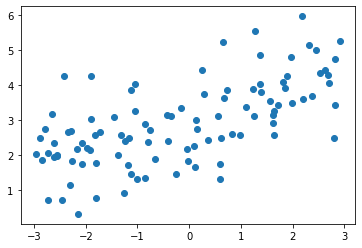

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('ploy', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [7]:
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

182.6398531015617

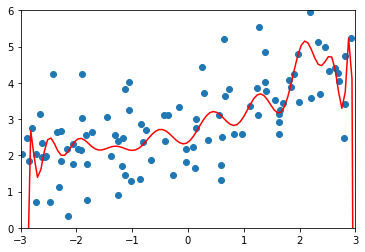

In [8]:
X_polt = np.linspace(-3, 3, 100).reshape(100, 1)
y_polt = poly_reg.predict(X_polt)

plt.scatter(x, y)
plt.plot(X_polt[:, 0], y_polt, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [9]:
def plot_model(model):
    X_polt = np.linspace(-3, 3, 100).reshape(100, 1)
    y_polt = model.predict(X_polt)

    plt.scatter(x, y)
    plt.plot(X_polt[:, 0], y_polt, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

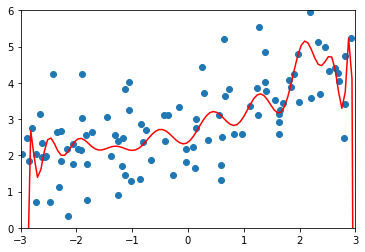

In [10]:
plot_model(poly_reg)

## LASSO

In [11]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ('ploy', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

In [12]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict=lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.128884905724

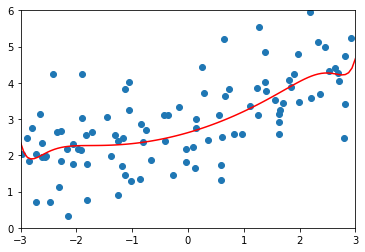

In [13]:
plot_model(lasso1_reg)

In [14]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict=lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1175157743270239

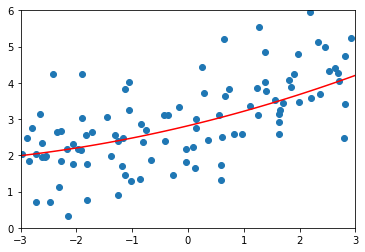

In [15]:
plot_model(lasso2_reg)

In [16]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict=lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8521194001323606

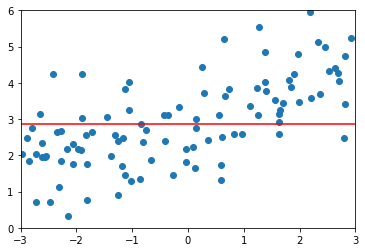

In [17]:
plot_model(lasso3_reg)